# Project 2 - Film Analysis

By Jared Lilly \
Instructor Mark Barbour \
Flatiron School

## Business problem
Three suggestions for getting into original video content for a new movie studio department
### Defining Success
For the purpose of this analysis we are leaning on IMDB's definition of a successful film, [How is the success of films and TV shows measured?](https://pro.imdb.com/content/article/entertainment-industry-resources/featured-articles/how-is-the-success-of-films-and-tv-shows-measured/GLFTC8ZLBBUSNTM3), which defines a successful film as a movie that makes twice as much as it's production budget to account for distribution costs. Some studies have increased the limit to 2.5x the production budget, however, for our purposes we'll stick with defining success as movies that made 2x their production budget.

## The Data
* Taken from datasets collected from IMDB, Box Office Mojo, and The Numbers
* Includes comprehensive information about production budget, domestic and international gross, directors, genres, etc. 

## Data Exploration
* Loaded in libraries and all datasets
* Basic data exploration to familiarize with data
* Combined datasets to check for correlations

In [89]:
#Loading in libraries and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sqlite3
import zipfile
%matplotlib inline

In [90]:
# Loaded in Box Office Mojo dataset and saved as dataframe, from looking at the data want to use studio vs gross
# and how many movies each studio makes per year
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200,NaN,2018
3383,Edward II (2018 re-release),FM,4800,NaN,2018
3384,El Pacto,Sony,2500,NaN,2018
3385,The Swan,Synergetic,2400,NaN,2018


In [91]:
#unzipped and extracted imdb database using an imported zipfile library
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')
conn = sqlite3.connect('zippedData/im.db')

In [170]:
# Combined two tables into a dataframe using SQL, filtered out all ratings with under 100 number of votes
q = """
    SELECT  movie_basics.start_year, 
            movie_basics.genres, 
            movie_basics.primary_title,
            movie_basics.runtime_minutes,
            movie_basics.original_title,
            movie_ratings.averagerating, 
            movie_ratings.numvotes  
       FROM movie_basics
      JOIN movie_ratings USING(movie_id);
    """
df_movie_rating = pd.read_sql(q, conn)
df_movie_rating

,start_year,genres,primary_title,runtime_minutes,original_title,averagerating,numvotes
0,2013,"Action,Crime,Drama",Sunghursh,175,Sunghursh,7,77
1,2019,"Biography,Drama",One Day Before the Rainy Season,114,Ashad Ka Ek Din,7,43
2,2018,Drama,The Other Side of the Wind,122,The Other Side of the Wind,7,4517
3,2018,"Comedy,Drama",Sabse Bada Sukh,nan,Sabse Bada Sukh,6,13
4,2017,"Comedy,Drama,Fantasy",The Wandering Soap Opera,80,La Telenovela Errante,6,119
...,...,...,...,...,...,...,...
73851,2019,Documentary,Diabolik sono io,75,Diabolik sono io,6,6
73852,2019,"Drama,Family",Sokagin Çocuklari,98,Sokagin Çocuklari,9,136
73853,2017,Documentary,Albatross,nan,Albatross,8,8
73854,2019,None,La vida sense la Sara Amat,nan,La vida sense la Sara Amat,7,5


In [94]:
#Created new column with name to merge databases for further analysis. 
df_bom['primary_title'] = df_bom['title']
df_bom

,title,studio,domestic_gross,foreign_gross,year,primary_title
0,Toy Story 3,BV,415000000,652000000,2010,Toy Story 3
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,Alice in Wonderland (2010)
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,Harry Potter and the Deathly Hallows Part 1
3,Inception,WB,292600000,535700000,2010,Inception
4,Shrek Forever After,P/DW,238700000,513900000,2010,Shrek Forever After
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,NaN,2018,The Quake
3383,Edward II (2018 re-release),FM,4800,NaN,2018,Edward II (2018 re-release)
3384,El Pacto,Sony,2500,NaN,2018,El Pacto
3385,The Swan,Synergetic,2400,NaN,2018,The Swan


In [171]:
# Combined imdb and box office mojo dataframes using the primary_title column
df_combined = pd.merge(df_movie_rating, df_bom, on='primary_title')

In [172]:
# dropped duplicate columns year and title
df_combined.drop(columns=['start_year','title'], inplace=True)

In [179]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           3020 non-null   object 
 1   primary_title    3027 non-null   object 
 2   runtime_minutes  2980 non-null   float64
 3   original_title   3027 non-null   object 
 4   averagerating    3027 non-null   float64
 5   numvotes         3027 non-null   int64  
 6   studio           3024 non-null   object 
 7   domestic_gross   3027 non-null   float64
 8   foreign_gross    3027 non-null   object 
 9   year             3027 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 340.1+ KB


In [174]:
df_combined.groupby('genres').mean().sort_values(by='domestic_gross', ascending=False)

,runtime_minutes,averagerating,numvotes,domestic_gross,year
genres,,,,,
"Adventure,Drama,Sport",93,6,62311,400700000,2013
"Action,Adventure,Sci-Fi",131,7,419617,234568085,2014
"Adventure,Drama,Sci-Fi",156,8,989725,208200000,2014
"Documentary,Drama,Sport",90,7,3570,206725000,2015
Sci-Fi,74,5,1760,206339000,2018
...,...,...,...,...,...
"Action,Horror,Mystery",100,5,12218,2800,2012
"Fantasy,Thriller",98,6,5010,1400,2018
"Comedy,Thriller",132,2,647,800,2014


In [175]:
df_genres = df_combined['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
print(df_genres)
df_genres.value_counts()

0            Action
0             Crime
0             Drama
1         Adventure
1             Drama
           ...     
3024          Drama
3025          Drama
3025        Romance
3026    Documentary
3026          Music
Length: 6978, dtype: object


Drama          1756
Comedy          926
Action          646
Romance         468
Thriller        453
Adventure       439
Crime           382
Biography       285
Horror          240
Documentary     227
Mystery         207
Fantasy         170
Animation       152
History         136
Sci-Fi          135
Family          117
Music            92
Sport            53
War              51
Western          21
Musical          18
News              4
dtype: int64

In [176]:
df_combined

,genres,primary_title,runtime_minutes,original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,"Action,Crime,Drama",Wazir,103,Wazir,7,15378,Relbig.,1100000,NaN,2016
1,"Adventure,Drama,Romance",On the Road,124,On the Road,6,37886,IFC,744000,8000000,2012
2,Drama,On the Road,89,On the Road,6,6,IFC,744000,8000000,2012
3,Drama,On the Road,121,On the Road,6,127,IFC,744000,8000000,2012
4,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,114,The Secret Life of Walter Mitty,7,275300,Fox,58200000,129900000,2013
...,...,...,...,...,...,...,...,...,...,...
3022,Drama,The Chambermaid,102,La camarista,7,147,FM,300,NaN,2015
3023,Romance,How Long Will I Love U,101,Chao shi kong tong ju,6,607,WGUSA,747000,82100000,2018
3024,Drama,Helicopter Eela,135,Helicopter Eela,5,673,Eros,72000,NaN,2018
3025,"Drama,Romance",Last Letter,114,"Ni hao, Zhihua",6,322,CL,181000,NaN,2018


In [177]:
#There are 22 missing values for domestic gross and 1106 for foreign gross. There can be several possible reasons for the
#the missing data, a major one being that it is very possible for a film to only have a domestic release. 

print(df_combined.isna().value_counts('domestic_gross'))
print(df_combined.isna().value_counts('foreign_gross'))

domestic_gross
False    3005
True       22
dtype: int64
foreign_gross
False    1832
True     1195
dtype: int64


In [182]:
#converted foreign gross to a float type for further analysis
df_combined['foreign_gross'] = df_combined['foreign_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

#Converted all NaN to 0, as it is plausible that movies were released either entirely abroad or domestically
df_combined['domestic_gross'] = df_combined['domestic_gross'].fillna(0)
df_combined['foreign_gross'] = df_combined['foreign_gross'].fillna(0)

#Created new column that combined domestic and foreign gross
df_combined['total_gross'] = df_combined['domestic_gross'] + df_combined['foreign_gross']

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [183]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           3020 non-null   object 
 1   primary_title    3027 non-null   object 
 2   runtime_minutes  2980 non-null   float64
 3   original_title   3027 non-null   object 
 4   averagerating    3027 non-null   float64
 5   numvotes         3027 non-null   int64  
 6   studio           3024 non-null   object 
 7   domestic_gross   3027 non-null   float64
 8   foreign_gross    3027 non-null   float64
 9   year             3027 non-null   int64  
 10  total_gross      3027 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 363.8+ KB


In [184]:
df_combined.sort_values('total_gross', ascending=False)

,genres,primary_title,runtime_minutes,original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
1907,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,141,Avengers: Age of Ultron,7,665594,BV,459000000,946400000,2015,1405400000
1301,"Action,Adventure,Sci-Fi",Black Panther,134,Black Panther,7,516148,BV,700100000,646900000,2018,1347000000
1984,"Action,Adventure,Fantasy",Star Wars: The Last Jedi,152,Star Wars: Episode VIII - The Last Jedi,7,462903,BV,620200000,712400000,2017,1332600000
2703,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom,128,Jurassic World: Fallen Kingdom,6,219125,Uni.,417700000,891800000,2018,1309500000
460,"Fantasy,Romance",Frozen,92,Wai nei chung ching,5,75,BV,400700000,875700000,2013,1276400000
...,...,...,...,...,...,...,...,...,...,...,...
518,"Animation,Drama",Death of a Superhero,97,Death of a Superhero,7,3234,Trib.,600,0,2012,600
254,Thriller,2:22,98,2:22,6,16318,Magn.,400,0,2017,400
3022,Drama,The Chambermaid,102,La camarista,7,147,FM,300,0,2015,300
2683,Horror,Satanic,85,Satanic,4,5381,Magn.,300,0,2016,300


In [185]:
from collections import Counter
genre_list = df_combined['genres'].apply(lambda x: x.split(','))
genre_count = Counter([genre for sublist in genre_list for genre in sublist])

# Create DataFrame for plotting
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns=['count'])

# Plot the genre distribution
plt.figure(figsize=(15, 10))
genre_df.sort_values('count', ascending=False).plot(kind='bar', legend=None, figsize=(12,6))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

<Figure size 864x432 with 0 Axes>

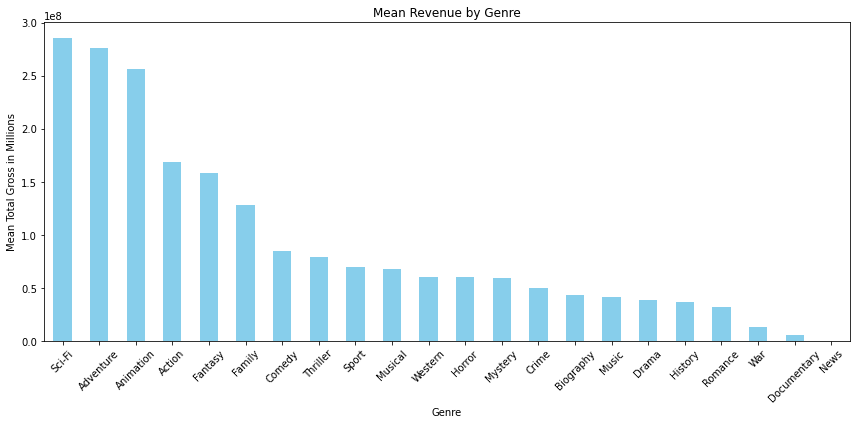

In [161]:
from collections import defaultdict
# Initialize defaultdicts to accumulate total gross and count for each genre
genre_revenue = defaultdict(float)
genre_count = defaultdict(int)

# Process genres and accumulate total gross and count
for index, row in df_combined.iterrows():
    genres = row['genres'].split(',')
    total_gross = row['total_gross']
    for genre in genres:
        genre_revenue[genre] += total_gross
        genre_count[genre] += 1

# Calculate mean revenue for each genre
genre_mean_revenue = {genre: genre_revenue[genre] / genre_count[genre] for genre in genre_revenue}

# Create DataFrame for plotting
genre_mean_revenue_df = pd.DataFrame.from_dict(genre_mean_revenue, orient='index', columns=['mean_revenue'])

# Sort by mean revenue
genre_mean_revenue_df = genre_mean_revenue_df.sort_values(by='mean_revenue', ascending=False)

# Plot the genre distribution with mean revenue
plt.figure(figsize=(12, 6))
genre_mean_revenue_df.plot(kind='bar', legend=None, figsize=(12, 6), color='skyblue')
plt.title('Mean Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Total Gross in Millions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue by Genre
After reviewing the values there are two major takeaways.
* 1. These films do not appear to have had a domestic release
* 2. There are a couple duplicate values caused by merging the different dataframes.

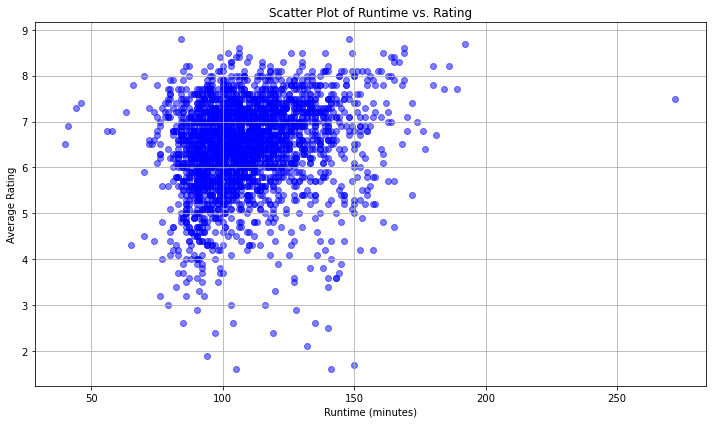

In [165]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['runtime_minutes'], df_combined['averagerating'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Runtime vs. Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

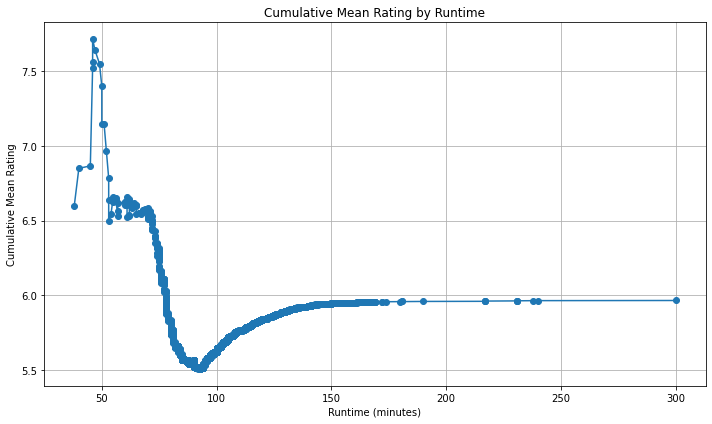

In [166]:
df = pd.DataFrame(data)

# Sort the DataFrame by runtime
df = df.sort_values(by='runtime_minutes')

# Calculate cumulative mean rating
df['cumulative_mean_rating'] = df['averagerating'].expanding().mean()

# Plot the cumulative mean rating
plt.figure(figsize=(10, 6))
plt.plot(df['runtime_minutes'], df['cumulative_mean_rating'], marker='o', linestyle='-')
plt.title('Cumulative Mean Rating by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Cumulative Mean Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
df_movie_rating.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,28648,27877,28648,28648
mean,2014,101,6,9041
std,3,23,1,48128
min,2010,12,1,101
25%,2012,88,5,203
50%,2014,96,6,469
75%,2016,110,7,1677
max,2019,1440,10,1841066


In [107]:
df_grouped_by_genre = df_movie_rating.groupby('genres')['averagerating'].mean()
df_grouped_by_genre.sort_values(ascending=False).head(50)
df_grouped_by_genre.plt

genres
Adventure,Drama,War              9
Documentary,Music,War            9
Comedy,History,Musical           8
Animation,History                8
Animation,Crime,Mystery          8
Animation,Documentary,Mystery    8
Comedy,Musical,Western           8
Documentary,Fantasy,Horror       8
Romance,Thriller,War             8
Comedy,Crime,Documentary         8
Animation,Crime,Documentary      8
Animation,Fantasy,Mystery        8
Adventure,Documentary,History    8
Animation,Romance                8
Fantasy,Musical,Sci-Fi           8
Documentary,Sport,Thriller       8
Action,Romance,War               8
Adventure,Animation,Horror       8
Comedy,Documentary,Musical       8
Comedy,History,War               8
Adventure,Documentary,Sport      8
Drama,Family,Musical             8
Documentary,Music,Musical        8
Animation,Drama,History          8
Musical,Thriller                 8
Animation,Drama,Sport            8
Biography,Documentary,Fantasy    8
Animation,Documentary,Drama      8
Comedy,Musica

In [108]:
df_grouped_by_genre

genres
Action                       5 
Action,Adventure             5 
Action,Adventure,Animation   7 
Action,Adventure,Biography   7 
Action,Adventure,Comedy      5 
                             ..
Thriller                     5 
Thriller,War                 6 
Thriller,Western             6 
War                          5 
Western                      4 
Name: averagerating, Length: 699, dtype: float64

In [110]:
df_tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [144]:
#Datatype for budget and gross is object 

df_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   float64       
 6   day_of_year        5782 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 316.3+ KB


In [112]:
# Created new dataframe with converted columns to float

df_tn_converted = df_tn_budgets.copy()
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_convert:
    df_tn_converted[column] = df_tn_converted[column].replace('[\$]','',regex=True)
    df_tn_converted[column] = df_tn_converted[column].replace('[,]','',regex=True).astype('float')

#Suppressed scientific notation, and checked datatype again. Used float64 as df was too large for integer Dtype 
pd.options.display.float_format = '{:.0f}'.format
print(df_tn_converted.dtypes)

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


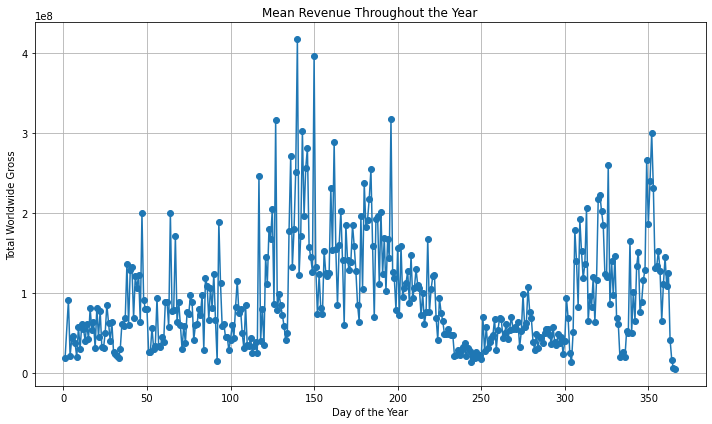

In [113]:
# Convert release_date to datetime format
df_tn_budgets['release_date'] = pd.to_datetime(df_tn_budgets['release_date'])

# Convert worldwide_gross to numeric, removing dollar signs and commas
df_tn_budgets['worldwide_gross'] = df_tn_budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Extract day of the year from release_date
df_tn_budgets['day_of_year'] = df_tn_budgets['release_date'].dt.dayofyear

# Group by day of the year and sum worldwide_gross
daily_revenue = df_tn_budgets.groupby('day_of_year')['worldwide_gross'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['day_of_year'], daily_revenue['worldwide_gross'], marker='o')
plt.title('Mean Revenue by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Total Worldwide Gross')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [114]:
#Pulling up the top 15 days of the year 
daily_revenue.sort_values(by='worldwide_gross', ascending=False).head(15)

,day_of_year,worldwide_gross
138,140,418237352
148,150,397331411
194,196,317770217
125,127,316343166
141,143,303055537
350,352,300566686
160,162,289453669
144,146,281566540
134,136,271290311
347,349,265947805


 Compared the days with the highest mean worldwide gross to national holidays in the United States

Day 140: May 19 Close to Memorial Day (last Monday in May)\
Day 150: May 29 Close to Memorial Day (last Monday in May)\
Day 196: July 14 Close to Independence Day (July 4)\
Day 127: May 6 Close to Memorial Day (last Monday in May)\
Day 143: May 22 Close to Memorial Day (last Monday in May)\
Day 352: December 17 Close to Christmas (December 25)\
Day 162: June 10 Near Juneteenth (June 19th)\
Day 146: May 25 Close to Memorial Day (last Monday in May)\
Day 136: May 15 Close to Memorial Day (last Monday in May)\
Day 349: December 14 Close to Christmas (December 25)\
Day 326: November 21 Close to Thanksgiving (fourth Thursday in November)\
Day 145: May 24 Close to Memorial Day (last Monday in May)\
Day 184: July 2 Close to Independence Day (July 4)\
Day 139: May 18 Close to Memorial Day (last Monday in May)\
Day 117: April 26 No major U.S. holiday nearby

## Successful Movies
* Created boolean column using our definition of any movie making more than twice it's production budget 
* Checked percentage of films that were successful
* Created scatterplot of financially successful vs unsuccessful films 
* Checked percentage of films that were based if budget was over 1 million

In [117]:
df_tn_converted['financially_successful'] = df_tn_converted['worldwide_gross'] >= 2 * df_tn_converted['production_budget']
df_tn_converted['financially_successful'].value_counts()
# approximately 45% of the films in our dataset were financially successful. 

False    3161
True     2621
Name: financially_successful, dtype: int64

In [132]:
#Converted release date to datetime format
df_tn_converted['release_date'] = pd.to_datetime(df_tn_converted['release_date'])

#Extracted day of the year
df_tn_converted['day_of_year'] = df_tn_converted['release_date'].dt.dayofyear

# Group by day of the year and calculate mean worldwide_gross
daily_mean_revenue = df_tn_converted.groupby('day_of_year')['worldwide_gross'].mean().reset_index()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,financially_successful
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,avatar,True
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,True
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,dark phoenix,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,avengers: age of ultron,True
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,star wars ep. viii: the last jedi,True
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,red 11,False
5778,79,"Apr 2, 1999",Following,6000,48482,240495,following,True
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,return to the land of wonders,False
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,a plague so pleasant,False


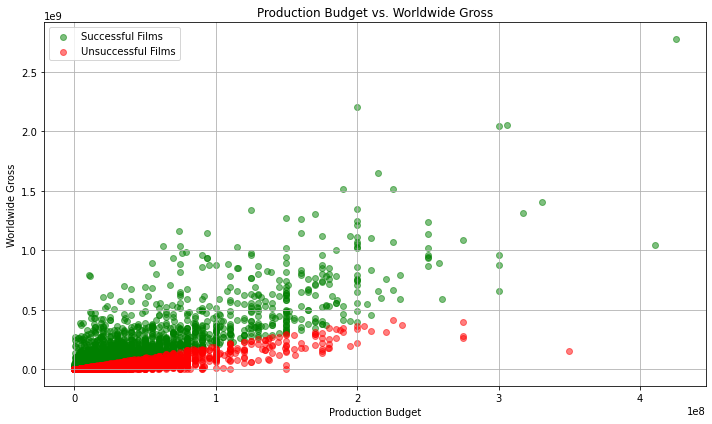

In [142]:
plt.figure(figsize=(10, 6))

# Plot successful films
plt.scatter(
    df_tn_converted[df_tn_converted['financially_successful']]['production_budget'], 
    df_tn_converted[df_tn_converted['financially_successful']]['worldwide_gross'], 
    color='green', label='Successful Films', alpha=0.5)

# Plot unsuccessful films
plt.scatter(
    df_tn_converted[~df_tn_converted['financially_successful']]['production_budget'], 
    df_tn_converted[~df_tn_converted['financially_successful']]['worldwide_gross'], 
    color='red', label='Unsuccessful Films', alpha=0.5)

# Title and labels
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.legend()  # Adding the legend
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [140]:
# Filter the dataset for films with budgets over and under 1 million
over_1m = df_tn_converted[df_tn_converted['production_budget'] > 1_000_000]
under_1m = df_tn_converted[df_tn_converted['production_budget'] <= 1_000_000]

# Calculate the success rate for each group
success_rate_over_1m = over_1m['financially_successful'].mean() * 100
success_rate_under_1m = under_1m['financially_successful'].mean() * 100

print(f"Success Rate for Films with Budget Over 1 Million: {success_rate_over_1m:.2f}%")
print(f"Success Rate for Films with Budget Under 1 Million: {success_rate_under_1m:.2f}%")

Success Rate for Films with Budget Over 1 Million: 46.41%
Success Rate for Films with Budget Under 1 Million: 35.49%


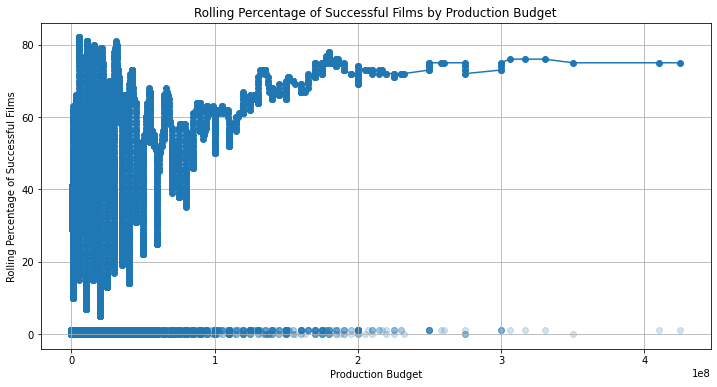

In [169]:
# Sort the DataFrame by production budget
df_tn_converted = df_tn_converted.sort_values(by='production_budget')

# Calculate the rolling percentage of successful films
window_size = 100  # You can adjust the window size as needed
df_tn_converted['rolling_successful'] = df_tn_converted['financially_successful'].rolling(window=window_size).mean()

# Plot the rolling percentage of successful films against the production budget
plt.figure(figsize=(12, 6))
plt.scatter(df_tn_converted['production_budget'], df_tn_converted['financially_successful'], alpha=0.2, label='Individual Films')
plt.plot(df_tn_converted['production_budget'], df_tn_converted['rolling_successful'] * 100, marker='o')
plt.xlabel('Production Budget')
plt.ylabel('Rolling Percentage of Successful Films')
plt.title('Rolling Percentage of Successful Films by Production Budget')
plt.grid(True)
plt.show()